In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
names = lambda o: print([name for name in dir(o) if name[0] != "_"])

In [8]:
names([])

['append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']


In [9]:
tips = sns.load_dataset("tips")

In [10]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [11]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [12]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [13]:
help(tips.reindex)

Help on method reindex in module pandas.core.frame:

reindex(labels=None, index=None, columns=None, axis=None, method=None, copy=True, level=None, fill_value=nan, limit=None, tolerance=None) method of pandas.core.frame.DataFrame instance
    Conform Series/DataFrame to new index with optional filling logic.
    
    Places NA/NaN in locations having no value in the previous index. A new object
    is produced unless the new index is equivalent to the current one and
    ``copy=False``.
    
    Parameters
    ----------
    
    keywords for axes : array-like, optional
        New labels / index to conform to, should be specified using
        keywords. Preferably an Index object to avoid duplicating data.
    
    method : {None, 'backfill'/'bfill', 'pad'/'ffill', 'nearest'}
        Method to use for filling holes in reindexed DataFrame.
        Please note: this is only applicable to DataFrames/Series with a
        monotonically increasing/decreasing index.
    
        * None (defa

In [14]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [18]:
# Mapeado
tips["size"].map

<bound method Series.map of 0      2
1      3
2      3
3      2
4      4
      ..
239    3
240    2
241    2
242    2
243    2
Name: size, Length: 244, dtype: int64>

In [26]:
help(tips["size"].map)

Help on method map in module pandas.core.series:

map(arg, na_action=None) -> 'Series' method of pandas.core.series.Series instance
    Map values of Series according to input correspondence.
    
    Used for substituting each value in a Series with another value,
    that may be derived from a function, a ``dict`` or
    a :class:`Series`.
    
    Parameters
    ----------
    arg : function, collections.abc.Mapping subclass or Series
        Mapping correspondence.
    na_action : {None, 'ignore'}, default None
        If 'ignore', propagate NaN values, without passing them to the
        mapping correspondence.
    
    Returns
    -------
    Series
        Same index as caller.
    
    See Also
    --------
    Series.apply : For applying more complex functions on a Series.
    DataFrame.apply : Apply a function row-/column-wise.
    DataFrame.applymap : Apply a function elementwise on a whole DataFrame.
    
    Notes
    -----
    When ``arg`` is a dictionary, values in Serie

In [20]:
def asigna_etiqueta(n):
    if n == 1:
        return "Solitario"
    elif n == 2:
        return "Pareja"
    elif n == 3:
        return "Trio"
    else:
        return "Otros"

In [21]:
tips["size"].map(asigna_etiqueta)

0      Pareja
1        Trio
2        Trio
3      Pareja
4       Otros
        ...  
239      Trio
240    Pareja
241    Pareja
242    Pareja
243    Pareja
Name: size, Length: 244, dtype: object

In [22]:
# Sustituir la coluna por las
tips["size"] = tips["size"].map(asigna_etiqueta)

In [23]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,Pareja
1,10.34,1.66,Male,No,Sun,Dinner,Trio
2,21.01,3.50,Male,No,Sun,Dinner,Trio
3,23.68,3.31,Male,No,Sun,Dinner,Pareja
4,24.59,3.61,Female,No,Sun,Dinner,Otros


In [25]:
tips.total_bill.apply(np.square)

0      288.6601
1      106.9156
2      441.4201
3      560.7424
4      604.6681
         ...   
239    842.7409
240    738.7524
241    513.9289
242    317.5524
243    352.6884
Name: total_bill, Length: 244, dtype: float64

In [27]:
'''
# Series Pandas
s.map()
s.apply()
# DataFrames
df.apply()
df.applymap()
'''

'\n# Series Pandas\ns.map()\ns.apply()\n# DataFrames\ndf.apply()\ndf.applymap()\n'

# Gestión de nulos

In [28]:
titanic = sns.load_dataset("titanic")

In [29]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [30]:
titanic.isna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [31]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [32]:
titanic.shape

(891, 15)

In [33]:
# sumar todos los valores nulos
titanic.isna().sum().sum()

869

In [34]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [35]:
help(titanic.deck.dropna)

Help on method dropna in module pandas.core.series:

dropna(axis=0, inplace=False, how=None) method of pandas.core.series.Series instance
    Return a new Series with missing values removed.
    
    See the :ref:`User Guide <missing_data>` for more on which values are
    considered missing, and how to work with missing data.
    
    Parameters
    ----------
    axis : {0 or 'index'}, default 0
        There is only one axis to drop values from.
    inplace : bool, default False
        If True, do operation inplace and return None.
    how : str, optional
        Not in use. Kept for compatibility.
    
    Returns
    -------
    Series or None
        Series with NA entries dropped from it or None if ``inplace=True``.
    
    See Also
    --------
    Series.isna: Indicate missing values.
    Series.notna : Indicate existing (non-missing) values.
    Series.fillna : Replace missing values.
    DataFrame.dropna : Drop rows or columns which contain NA values.
    Index.dropna : Dr

In [37]:
titanic.deck.dropna().shape

(203,)

In [38]:
titanic.shape

(891, 15)

In [39]:
titanic.deck.dropna(inplace = True)

In [40]:
titanic.shape

(891, 15)

In [48]:
d = titanic.deck.copy()

In [49]:
d.isna().sum()

688

In [51]:
d.dropna(inplace = True)

In [52]:
d.isna().sum()

0

In [55]:
t = titanic.head(10)
t

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [56]:
t.dropna(how = "all")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [60]:
t.dropna(thresh = 14)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [61]:
t.dropna(thresh = t.shape[1]-1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [62]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [64]:
titanic.groupby(by = "sex").mean()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
sex,,,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305


In [65]:
titanic.groupby(by = "sex").mean().age

sex
female    27.915709
male      30.726645
Name: age, dtype: float64

In [66]:
titanic.groupby(by = ["sex", "pclass"]).mean().age

sex     pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: age, dtype: float64

In [68]:
d = titanic.groupby(by = "sex").mean().age

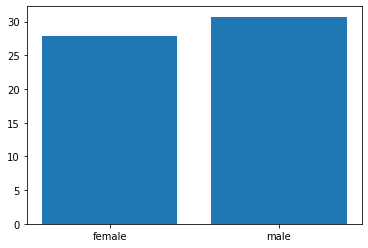

In [69]:
plt.bar(d.index, d);

In [70]:
s = pd.Series([10, 11, 9, 8, 9, 8, 7, 6, 8, 5, 6, 5, 4, 3, 6, 7, 9])

In [73]:
s.rolling(window = 4).mean()

0      NaN
1      NaN
2      NaN
3     9.50
4     9.25
5     8.50
6     8.00
7     7.50
8     7.25
9     6.50
10    6.25
11    6.00
12    5.00
13    4.50
14    4.50
15    5.00
16    6.25
dtype: float64

In [74]:
s.rolling(window = 4, min_periods = 2).mean()

0       NaN
1     10.50
2     10.00
3      9.50
4      9.25
5      8.50
6      8.00
7      7.50
8      7.25
9      6.50
10     6.25
11     6.00
12     5.00
13     4.50
14     4.50
15     5.00
16     6.25
dtype: float64

In [75]:
help(s.rolling)

Help on method rolling in module pandas.core.generic:

rolling(window: 'Union[int, timedelta, BaseOffset, BaseIndexer]', min_periods: 'Optional[int]' = None, center: 'bool_t' = False, win_type: 'Optional[str]' = None, on: 'Optional[str]' = None, axis: 'Axis' = 0, closed: 'Optional[str]' = None) method of pandas.core.series.Series instance
    Provide rolling window calculations.
    
    Parameters
    ----------
    window : int, offset, or BaseIndexer subclass
        Size of the moving window. This is the number of observations used for
        calculating the statistic. Each window will be a fixed size.
    
        If its an offset then this will be the time period of each window. Each
        window will be a variable sized based on the observations included in
        the time-period. This is only valid for datetimelike indexes.
    
        If a BaseIndexer subclass is passed, calculates the window boundaries
        based on the defined ``get_window_bounds`` method. Additional

In [76]:
from scipy.io import wavfile

In [77]:
wavfile.read("toy_story.wav")

(44100,
 array([[    0,     0],
        [    0,     0],
        [    0,     0],
        ...,
        [-2309, -2759],
        [-1436, -2033],
        [ -594, -1332]], dtype=int16))

In [78]:
type(wavfile.read("toy_story.wav"))

tuple

In [79]:
w = wavfile.read("toy_story.wav")

In [83]:
freq, sound = wavfile.read("toy_story.wav")

In [84]:
freq

44100

In [85]:
sound

array([[    0,     0],
       [    0,     0],
       [    0,     0],
       ...,
       [-2309, -2759],
       [-1436, -2033],
       [ -594, -1332]], dtype=int16)

In [86]:
sound.shape

(264431, 2)

In [87]:
sound.shape[0] / freq

5.996167800453515

In [88]:
left = sound[:, 0]
right = sound[:, 1]

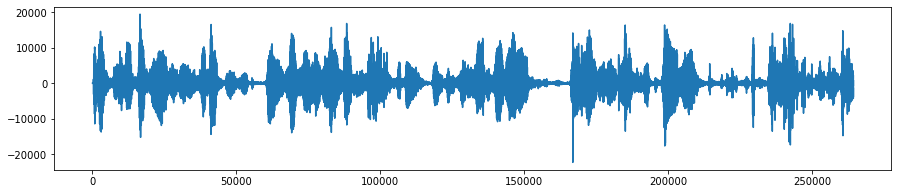

In [90]:
plt.figure(figsize = (15, 3))
plt.plot(left);

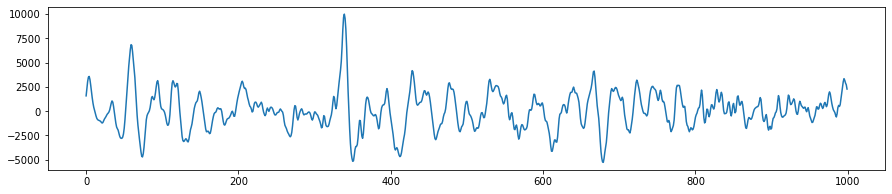

In [91]:
plt.figure(figsize = (15, 3))
plt.plot(left[100000:100000+1000]);

In [92]:
left.mean()

-0.31653247917226046

In [93]:
np.abs(left)

array([   0,    0,    0, ..., 2309, 1436,  594], dtype=int16)

In [94]:
left = np.abs(left)

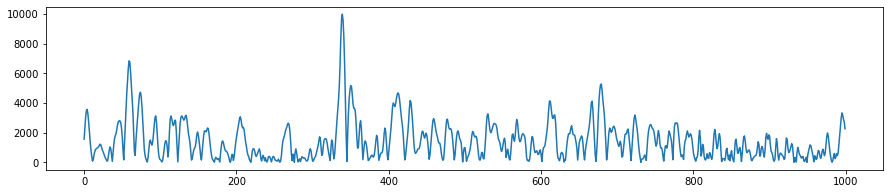

In [95]:
plt.figure(figsize = (15, 3))
plt.plot(left[100000:100000+1000]);

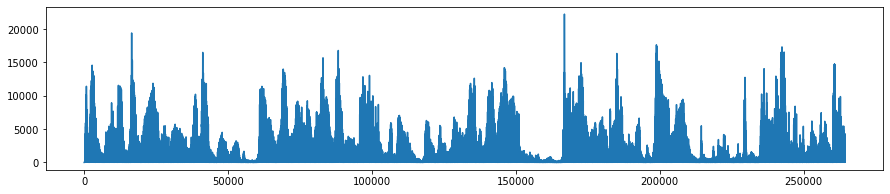

In [96]:
plt.figure(figsize = (15, 3))
plt.plot(left);

In [98]:
s_left = pd.Series(left)

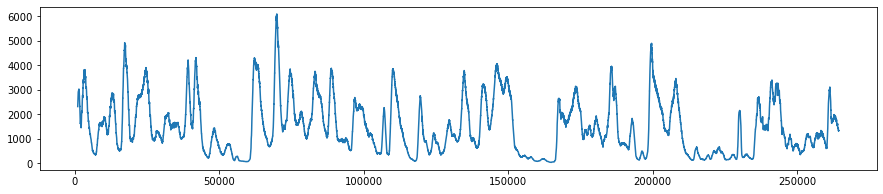

In [99]:
plt.figure(figsize = (15, 3))
plt.plot(s_left.rolling(window = 1000).mean());